In [20]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx

print("imports done")

imports done


In [21]:
def parseGraph(nameFilePath):
    graphMinCut = []
    graphVertices = []
    graphEdges = []
    with open(nameFilePath) as f:
        lines = f.readlines()
        minCutLen = int(lines[0][:-1].split()[-1])
        for i in range(1,1+minCutLen):
            graphMinCut.append(lines[i][:-1])
        numberVertices = int(lines[1+minCutLen][:-1].split()[-1])
        for i in range(1 + 1 + minCutLen, 1 + 1 + minCutLen + numberVertices):
            graphVertices.append(lines[i][:-1])
        numberEdges = int(lines[1+minCutLen+1+numberVertices][:-1].split()[-1])
        for i in range(1+minCutLen+1+1+numberVertices, 1+minCutLen+1+1+numberVertices + numberEdges):
            graphEdges.append(lines[i][:-1])
    return graphMinCut, graphVertices, graphEdges

        
def createRandomGraph(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(i+1,n):
            if math.floor(random.random()*2) == 1:
                G.add_edge(i,j)
    return G

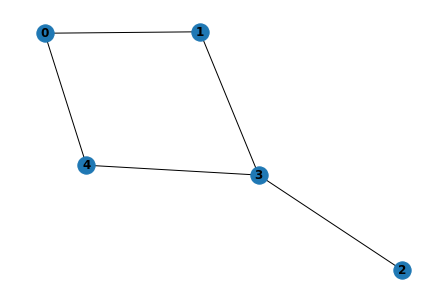

In [24]:
nx.draw(createRandomGraph(5), with_labels=True, font_weight='bold')